In [1]:
import pandas as pd
import mysql.connector

con=mysql.connector.connect (
    host="localhost",           
    port=3306,                  
    user="root",                
    password="dangerous048",    
    database="studentdb" )
    

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
con

In [4]:
df=pd.read_sql_query('select * from mark2',con)
df

,name,gender,DOB,maths,physics,chemistry,english,biology,economics,history,civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [5]:
df.dtypes

name         object
gender       object
DOB          object
maths         int64
physics       int64
chemistry     int64
english       int64
biology       int64
economics     int64
history       int64
civics        int64
dtype: object

In [6]:
df.shape

(10, 11)

# EDA

# Marks scored by student in different subjects

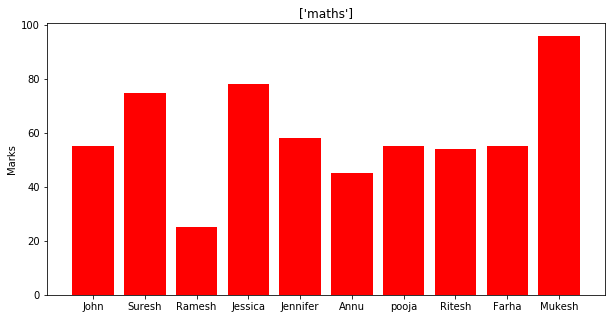

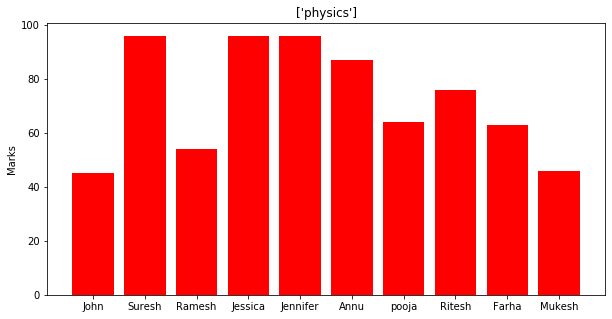

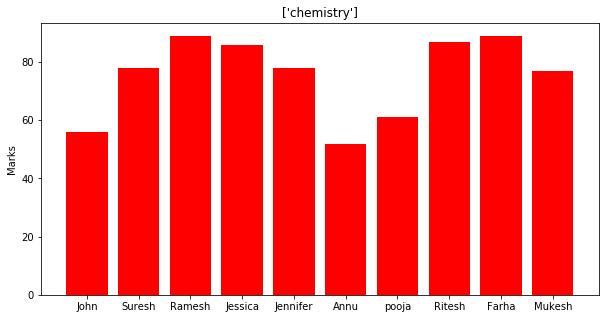

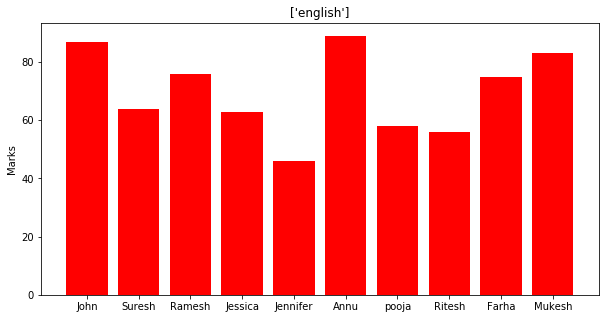

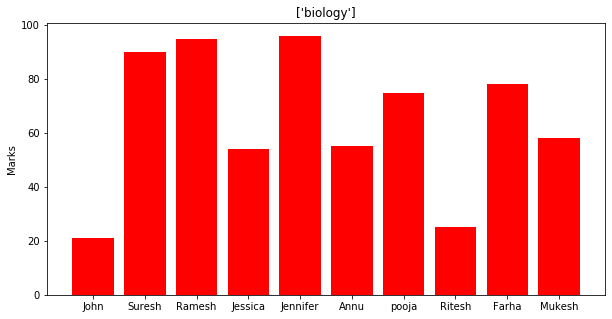

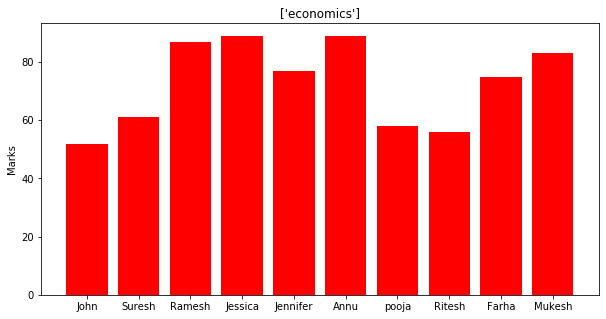

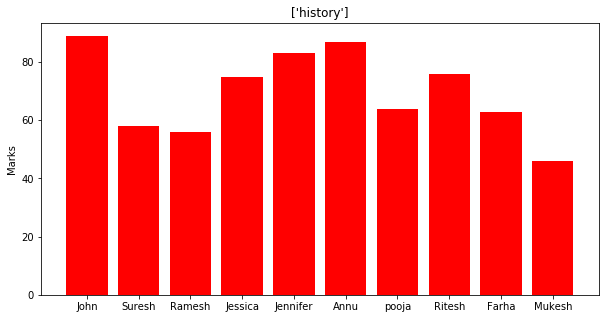

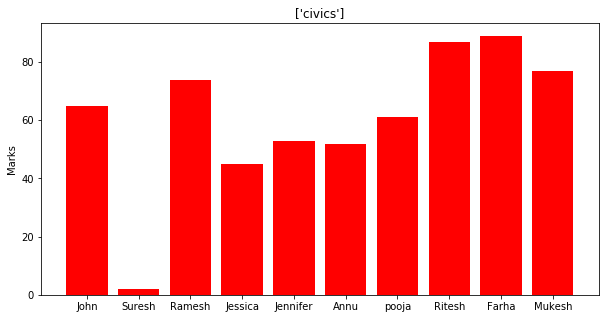

In [7]:
numerical=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical:
    
    plt.figure(figsize=(10,5))
    plt.bar(df['name'],df[feature],color='red')
    
    plt.title(str([feature]))
    plt.ylabel('Marks')
    plt.show()
    

In [8]:
#highest marks scored by student in different subjects are as follows:-
#maths	mukesh
#physics	suresh,jessica,jennifer
#chemistry	ramesh,farah
#english	annu
#biology	jennifer
#economics	jessica,annu
#history	john
#civics---->farha

In [9]:
#ramesh has scored below average in maths.
#suresh has scored very low in civics.

# Students average performance in different subjects grouped by gender:-

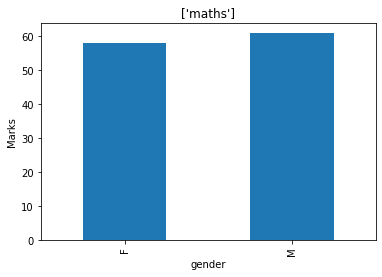

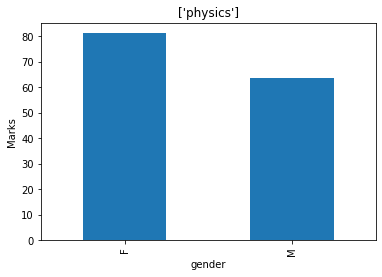

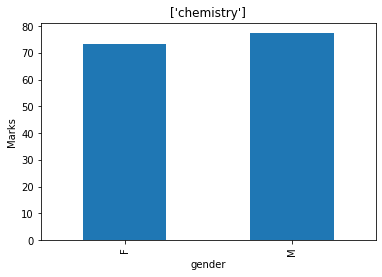

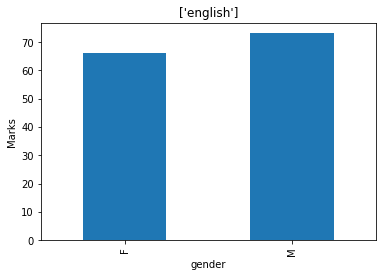

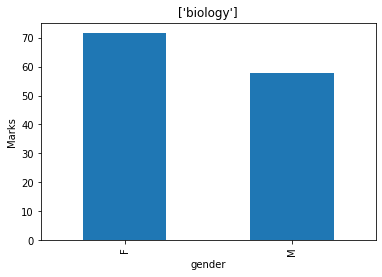

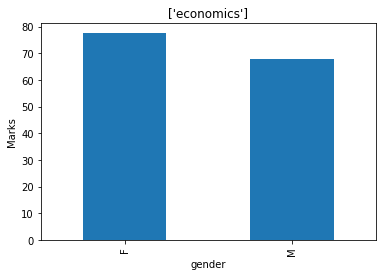

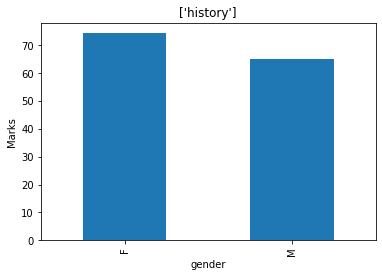

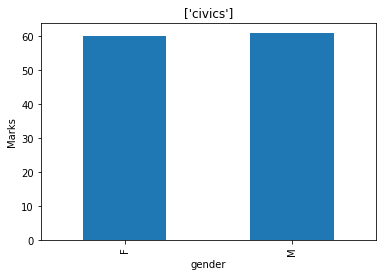

In [10]:
for feature in numerical:

    df.groupby('gender')[feature].mean().plot.bar()
    plt.title(str([feature]))
    plt.ylabel('Marks')
    plt.show()

In [11]:
#students performance in average in different subjects grouped by gender:-
#maths	male
#physics	female
#chemistry	male
#english	male
#biology	female
#economics	female
#history	female
#civics---->male

# Feature engineering

In [12]:
df['total marks secured']=df[numerical].sum(axis=1)
df.head()

,name,gender,DOB,maths,physics,chemistry,english,biology,economics,history,civics,total marks secured
0,John,M,1988-04-05,55,45,56,87,21,52,89,65,470
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2,524
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45,586
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53,587


In [13]:
df['percentage']=df['total marks secured']/8 #8 is number of subjects
df

,name,gender,DOB,maths,physics,chemistry,english,biology,economics,history,civics,total marks secured,percentage
0,John,M,1988-04-05,55,45,56,87,21,52,89,65,470,58.750
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2,524,65.500
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556,69.500
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45,586,73.250
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53,587,73.375
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52,556,69.500
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61,496,62.000
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,517,64.625
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89,587,73.375
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77,566,70.750


# EDA part-2

In [14]:
#positions of students in class according to their percentages

In [15]:
df.sort_values(by=['percentage'],ascending=False,inplace=True)
df.head()

,name,gender,DOB,maths,physics,chemistry,english,biology,economics,history,civics,total marks secured,percentage
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53,587,73.375
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89,587,73.375
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45,586,73.250
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77,566,70.750
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556,69.500


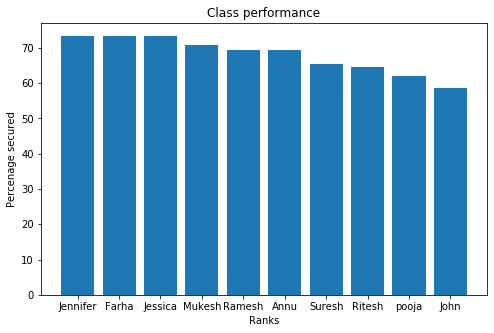

In [16]:
plt.figure(figsize=(8,5))
plt.bar(df['name'],df['percentage'])
plt.title('Class performance')
plt.xlabel('Ranks')
plt.ylabel('Percenage secured')
plt.show()

# Conclusion:-

In [17]:
#Hence jennifer and farha are joint toppers in the class
#jessica is 2nd
#john is last.